In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# Least-Squares Fit and the Millikan Experiment

## 1. Data Visualization

Use the file **`millikan.txt`**, which contains two columns of numerical data representing the values of $x$ and $y$ for a given dataset.  

Write a program that reads the data from the file and produces a plot in which **each data point is represented by a dot or a circle**.

---



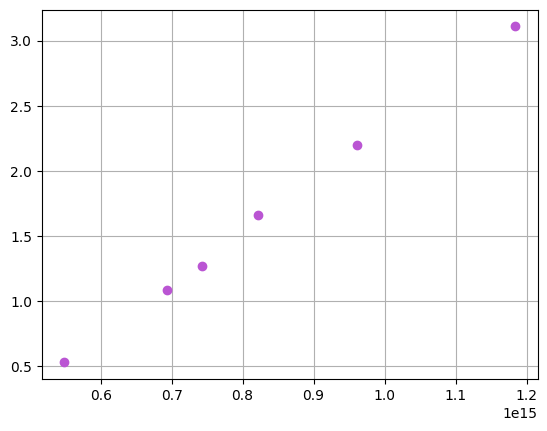

In [2]:
data = np.loadtxt('millikan.txt')
plt.plot(data[:, 0], data[:, 1], 'o', color = 'mediumorchid')
plt.grid()
plt.show()

## 2. Least-Squares Linear Fit

Extend the program by adding code, prior to plotting, that computes a **least-squares linear fit** to the data.  

To do this, compute the quantities $E_x$, $E_y$, $E_{xx}$, and $E_{xy}$, and from them determine the **slope** $m$ and **intercept** $c$ of the linear equation

$$
y = m x + c,
$$

where

$$
E_x = \frac{1}{N} \sum_{i=1}^{N} x_i, \qquad
E_y = \frac{1}{N} \sum_{i=1}^{N} y_i,
$$

$$
E_{xx} = \frac{1}{N} \sum_{i=1}^{N} x_i^2, \qquad
E_{xy} = \frac{1}{N} \sum_{i=1}^{N} x_i y_i.
$$

The slope $m$ and intercept $c$ are given by

$$
m = \frac{E_{xy} - E_x E_y}{E_{xx} - E_x^2},
$$

$$
c = \frac{E_{xx} E_y - E_x E_{xy}}{E_{xx} - E_x^2}.
$$

These values of $m$ and $c$ minimize the quantity

$$
\chi^2 = \sum_{i=1}^{N} \left(m x_i + c - y_i \right)^2.
$$

---



In [3]:
def least_square_fit(data):
    N = len(data)
    Ex, Ey, Exx, Exy = 0, 0, 0, 0
    for i in range(N):
        Ex += data[i, 0]
        Ey += data[i, 1]
        Exx += data[i, 0]**2
        Exy += data[i, 0]*data[i, 1]
    Ex /= N
    Ey /= N
    Exx /= N
    Exy /= N
    
    m = (Exy - Ex*Ey)/(Exx-Ex**2)
    c = (Exx*Ey - Ex*Exy)/(Exx - Ex**2)
    return m, c

m, c = least_square_fit(data)

print(m)
print()
print(c)

4.088227358517516e-15

-1.7312358039813558


## 3. Fitted Line Representation

Compute the values $m x_i + c$ for all data points and store them in a new array.  

Plot these values as a **straight line**, superimposed on the original data points.

---



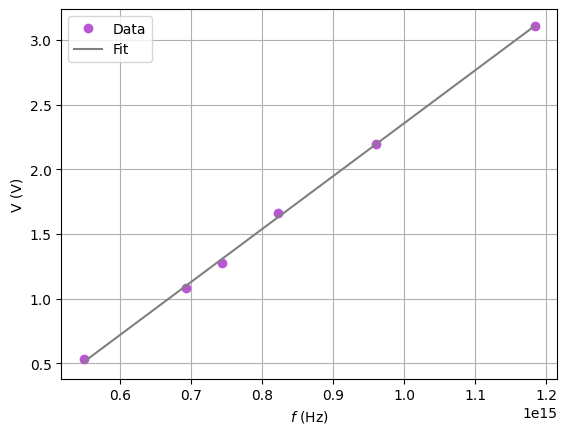

In [4]:
x2 = np.linspace(data[0, 0], data[-1, 0], 6)
y2 = m*x2 + c

plt.plot(data[:, 0], data[:, 1], 'o', color = 'mediumorchid')
plt.plot(x2, y2, color = 'gray')
plt.legend(['Data', 'Fit'])
plt.xlabel('$f$ (Hz)')
plt.ylabel('V (V)')
plt.grid()
plt.show() 

## 4. Physical Interpretation: The Millikan Experiment

The data contained in the file **`millikan.txt`** correspond to the historic experiment performed by **Robert Millikan** to study the **photoelectric effect**.  

When light of a suitable wavelength strikes a metal surface, photons may collide with conduction electrons and eject them from the metal.  

The energy of an emitted electron is equal to the energy of the incident photon minus a small quantity $\phi$, known as the **work function**, which represents the minimum energy required to remove the electron from the surface.

The photon energy is given by

$$
E_{\text{photon}} = h \nu,
$$

where $h$ is **Planck’s constant** and $\nu$ is the frequency of the incident light.

If $V$ is the stopping potential required to prevent the electron from escaping, the following relation holds:

$$
V = \frac{h}{e} \nu - \phi,
$$

where $e$ is the elementary charge. This equation was derived by **Albert Einstein in 1905**.

The data in **`millikan.txt`** represent the frequency $\nu$ (in hertz, first column) and the stopping potential $V$ (in volts, second column).  

Using the equation above and the linear fitting procedure developed previously, obtain an **estimate of Planck’s constant**, taking the electron charge to be

$$
e = 1.602 \times 10^{-19} \,\text{C}.
$$


In [5]:
e = 1.602e-19

h = m*e
print(f'Planck\'s Constant: h = {h}')

Planck's Constant: h = 6.549340228345061e-34
